# Model the Problem

## Preprocessing the data

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('Tweets_explored.csv')

In [3]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens,text_stem,text_lemmatize,pos_tags,text_named_entities
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach...",RT IoTJobs_eu Googl acquir Pari base machin l...,RT IoTJobs_eu Google acquires Paris based mac...,"[('RT', 'NN'), ('IoTJobs_eu', 'NNP'), ('Google...","['RT', 'IoTJobs_eu Google', 'Paris', 'u2K6SSbg..."
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,...",RT bobehay One Third of BigData Develop Use M...,RT bobehayes One Third of BigData Developers ...,"[('RT', 'NN'), ('bobehayes', 'NNS'), ('One', '...","['RT', 'BigData Developers Use', 'jsfNxtFvmg']"
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller...",RT Le_Coeur Comprendr le chatbot pour briller...,RT Le_Coeur Comprendre le chatbot pour brille...,"[('RT', 'NN'), ('Le_Coeur', 'NNP'), ('Comprend...","['RT Le_Coeur Comprendre', 'WMTevZtFFj']"
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...,"[('DeepMind', 'NNP'), ('has', 'VBZ'), ('starte...","['DeepMind', 'uX1BV87m3q AI']"
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...,"[('DeepMind', 'NNP'), ('has', 'VBZ'), ('starte...","['DeepMind', 'pzaFWsDAj7 AI']"


In [4]:
df.shape

(1000, 9)

In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords

In [7]:
stop = stopwords.words('english')

In [8]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [11]:
tokens_list = df['text_tokens'].tolist()

In [12]:
tokens_list

['rt,iotjobs_eu,google,acquires,paris,based,machine,learning,startup,moodstocks,https,co,u2k6ssbgyo,iot,news,career,jobs,bigdata',
 'rt,bobehayes,one,third,bigdata,developers,use,machinelearning,https,co,jsfnxtfvmg,datascience',
 'rt,le_coeur,comprendre,le,chatbot,pour,briller,en,soci,https,co,wmtevztffj',
 'deepmind,started,training,neural,networks,recognize,signs,eye,disease,medical,images,https,co,ux1bv87m3q,ai,eye',
 'deepmind,started,training,neural,networks,recognize,signs,eye,disease,medical,images,https,co,pzafwsdaj7,ai,eye',
 'five,ways,companies,using,machine,learning,transform,health,care,ai,machinelearning,ml,https,co,qucsajnveh',
 'rt,sharafu_kk,machine,learning,day,https,co,yiueasvnoa',
 'machine,learning,day,https,co,yiueasvnoa',
 'rt,ri_science,google,working,nhs,train,neural,network,check,eye,scans,early,signs,blindness,https,co,xpy',
 'rt,newscientist,google,new,nhs,deal,start,machine,learning,marketplace,https,co,zmnvazbkrb,https,co,w0bzgkyhq9',
 'researchers,incorpo

In [13]:
# Let us get the frequency count
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['rt', 'iotjobs_eu', 'google', 'acquires', 'paris', 'based', 'machine', 'learning', 'startup', 'moodstocks', 'https', 'co', 'u2k6ssbgyo', 'iot', 'news', 'career', 'jobs', 'bigdata']
['rt', 'bobehayes', 'one', 'third', 'bigdata', 'developers', 'use', 'machinelearning', 'https', 'co', 'jsfnxtfvmg', 'datascience']
['rt', 'le_coeur', 'comprendre', 'le', 'chatbot', 'pour', 'briller', 'en', 'soci', 'https', 'co', 'wmtevztffj']
['deepmind', 'started', 'training', 'neural', 'networks', 'recognize', 'signs', 'eye', 'disease', 'medical', 'images', 'https', 'co', 'ux1bv87m3q', 'ai', 'eye']
['deepmind', 'started', 'training', 'neural', 'networks', 'recognize', 'signs', 'eye', 'disease', 'medical', 'images', 'https', 'co', 'pzafwsdaj7', 'ai', 'eye']
['five', 'ways', 'companies', 'using', 'machine', 'learning', 'transform', 'health', 'care', 'ai', 'machinelearning', 'ml', 'https', 'co', 'qucsajnveh']
['rt', 'sharafu_kk', 'machine', 'learning', 'day', 'https', 'co', 'yiueasvnoa']
['machine', 'learnin

In [14]:
frequency_words['data']

89

## TF - IDF

In [15]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [16]:
df_tfidf.head()

,word,tf
0,nkw09xdo2j,1
1,veut,1
2,vzglijbc6k,19
3,optical,1
4,aug,3


In [27]:
df_tfidf.sort(['tf', 'word'], ascending=[False, True],inplace=True)

In [28]:
df_tfidf.head()

,word,tf
723,https,1177
2309,co,1126
1037,learning,789
123,machine,782
191,rt,453


Let us get in how many documents (each title) does the word occur

In [ ]:
def stem(row):
    text_stem =""
    text_tokens = nltk.wordpunct_tokenize(row['text_preprocessed'])
    for token in text_tokens:
        text_stem = text_stem + " " + porter_stemmer.stem(token)
    return text_stem

In [33]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in tokens_list:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [34]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [35]:
df_tfidf.head()

,word,tf,document_count
723,https,1177,919
2309,co,1126,897
1037,learning,789,776
123,machine,782,778
191,rt,453,448


In [36]:
df_tfidf.tail()

,word,tf,document_count
2455,zwei,1,1
2371,zxs8glz45c,1,1
187,zxsv2cqdf0,1,1
1066,zyipa1v6yo,1,1
1464,zyrobotics,1,1


In [37]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [38]:
total_docs

1000

### Let us compute the tf-idf 

- Term Frequency = tf
- Inverse Document Frequency = idf

**idf = log(total_docs/number of documents that contain the word)**

**tf-idf = tf . idf**

In [39]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [41]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [42]:
df_tfidf.head()

,word,tf,document_count,tfidf
723,https,1177,919,0.000000
2309,co,1126,897,0.000000
1037,learning,789,776,0.000000
123,machine,782,778,0.000000
191,rt,453,448,136.366588


In [43]:
df_tfidf.tail()

,word,tf,document_count,tfidf
2455,zwei,1,1,3
2371,zxs8glz45c,1,1,3
187,zxsv2cqdf0,1,1,3
1066,zyipa1v6yo,1,1,3
1464,zyrobotics,1,1,3


In [44]:
df_tfidf.sort(['tfidf'],ascending=True,inplace=True)

In [46]:
df_tfidf.head()

,word,tf,document_count,tfidf
723,https,1177,919,0
2309,co,1126,897,0
1037,learning,789,776,0
123,machine,782,778,0
141,ibm_france,1,1,3


In [47]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [48]:
df_tfidf.tail()

,word,tf,document_count,tfidf
2292,key,126,122,113.789338
2496,machinelearning,175,175,122.319751
1779,google,213,209,128.238778
191,rt,453,448,136.366588
1226,ai,256,244,154.127358


In [49]:
df_tfidf.set_index('word', inplace=True)

In [50]:
df_tfidf.head()

,tf,document_count,tfidf
word,,,
https,1177,919,0.1
co,1126,897,0.1
learning,789,776,0.1
machine,782,778,0.1
ibm_france,1,1,3.0


** now let us plot a word cloud to see the prominence of the word **

In [51]:
wordcloud = WordCloud()

In [52]:
word_tfidf = df_tfidf['tfidf'].to_dict()

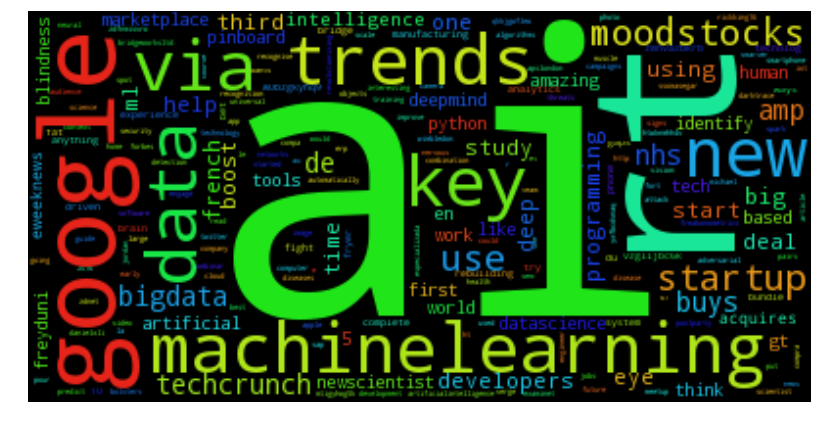

In [53]:
wordcloud.generate_from_frequencies(word_tfidf.items())
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Topic modelling (LDA - Latent Dirichlet allocation)

In [4]:
import lda
import numpy as np
import lda.datasets
import sklearn.feature_extraction.text as text

ImportError: cannot import name __check_build

### Generating the document term matrix

In [38]:
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [39]:
dtm = vectorizer.fit_transform(df.title).toarray()

In [40]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Loading the vocabulary

In [41]:
vocab = np.array(vectorizer.get_feature_names())

In [42]:
vocab[:20]

array(['10', '101', '11', '16', '2016', '50', '8m', 'access', 'advances',
       'affect', 'age', 'agree', 'aka', 'algorithms', 'amazon',
       'analogies', 'analysis', 'analytical', 'analytics', 'analyze'], 
      dtype='<U15')

In [43]:
titles = df.title

In [44]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)

In [45]:
model.fit(dtm)

In [46]:
model.topic_word_

array([[  5.36834272e-03,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.31519082e-05,   5.31519082e-05],
       [  5.31519082e-05,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.36834272e-03,   5.31519082e-05],
       [  4.75873227e-05,   4.80631960e-03,   4.75873227e-05, ...,
          4.75873227e-05,   4.75873227e-05,   4.75873227e-05],
       [  4.42203944e-05,   4.42203944e-05,   4.46625984e-03, ...,
          4.46625984e-03,   4.42203944e-05,   4.46625984e-03],
       [  6.09236018e-05,   6.09236018e-05,   6.09236018e-05, ...,
          6.09236018e-05,   6.09236018e-05,   6.09236018e-05]])

In [47]:
topic_word = model.topic_word_ 

In [48]:
topic_word

array([[  5.36834272e-03,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.31519082e-05,   5.31519082e-05],
       [  5.31519082e-05,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.36834272e-03,   5.31519082e-05],
       [  4.75873227e-05,   4.80631960e-03,   4.75873227e-05, ...,
          4.75873227e-05,   4.75873227e-05,   4.75873227e-05],
       [  4.42203944e-05,   4.42203944e-05,   4.46625984e-03, ...,
          4.46625984e-03,   4.42203944e-05,   4.46625984e-03],
       [  6.09236018e-05,   6.09236018e-05,   6.09236018e-05, ...,
          6.09236018e-05,   6.09236018e-05,   6.09236018e-05]])

### Finding the key words that come together for each topic

In [49]:
n_top_words = 8

In [50]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: spark apache pandas code work taxi open
Topic 1: learning machine deep non guide interactive depth
Topic 2: data science course introduction sql use genomic
Topic 3: python using analysis bayesian neural learn scikit
Topic 4: twitter io language api processing d3 free


### Finding the Topic for each Document

In [51]:
doc_topic = model.doc_topic_

In [52]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,titles[n]))

topic: 4 , Deep Advances in Generative Modeling
topic: 3 , A Neural Network in 11 lines of Python 
topic: 1 , Python, Machine Learning, and Language Wars
topic: 2 , Markov Chains Explained Visually
topic: 3 , Dplython: Dplyr for Python
topic: 3 , Inferring causal impact using Bayesian structural time-series models
topic: 4 , Tutorial: Web scraping and mapping breweries with import.io and R
topic: 0 , A Billion Taxi Rides on Amazon EMR running Spark
topic: 3 , The rise of greedy robots
topic: 3 , Extracting image metadata at scale


# Sentiment Analysis

Sentiment analysis aims to determine the attitude of a speaker or a writer with respect to some topic or the overall contextual polarity of a document. The attitude may be his or her judgment or evaluation (see appraisal theory), affective state (that is to say, the emotional state of the author when writing), or the intended emotional communication (that is to say, the emotional effect the author wishes to have on the reader).

A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level — whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral. We will use knowledge-based techniques classify text by affect categories based on the presence of unambiguous affect words such as happy, sad, afraid, and bored.

Here is a link to the Sentiment Analysis from nltk site - http://www.nltk.org/howto/sentiment.html

Here is an example of Sentiment Analysis on Tweets data - http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/


In [53]:
from nltk.classify import NaiveBayesClassifier
import math
import collections

In [54]:
pos_features = []
neg_features = []

In [55]:
def make_full_dict(word):
    return dict([(word, True)])

In [56]:
with open('postive_words.txt','r') as posFile:
    lines = posFile.readlines()
    for line in lines:
        pos_features.append([make_full_dict(line.rstrip()),'pos'])
        

In [57]:
pos_features

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [58]:
with open('negative_words.txt','r',encoding='utf-8') as negFile:
    lines = negFile.readlines()
    for line in lines:
        neg_features.append([make_full_dict(line.rstrip()),'neg'])

In [59]:
neg_features

[[{'2-faced': True}, 'neg'],
 [{'2-faces': True}, 'neg'],
 [{'abnormal': True}, 'neg'],
 [{'abolish': True}, 'neg'],
 [{'abominable': True}, 'neg'],
 [{'abominably': True}, 'neg'],
 [{'abominate': True}, 'neg'],
 [{'abomination': True}, 'neg'],
 [{'abort': True}, 'neg'],
 [{'aborted': True}, 'neg'],
 [{'aborts': True}, 'neg'],
 [{'abrade': True}, 'neg'],
 [{'abrasive': True}, 'neg'],
 [{'abrupt': True}, 'neg'],
 [{'abruptly': True}, 'neg'],
 [{'abscond': True}, 'neg'],
 [{'absence': True}, 'neg'],
 [{'absent-minded': True}, 'neg'],
 [{'absentee': True}, 'neg'],
 [{'absurd': True}, 'neg'],
 [{'absurdity': True}, 'neg'],
 [{'absurdly': True}, 'neg'],
 [{'absurdness': True}, 'neg'],
 [{'abuse': True}, 'neg'],
 [{'abused': True}, 'neg'],
 [{'abuses': True}, 'neg'],
 [{'abusive': True}, 'neg'],
 [{'abysmal': True}, 'neg'],
 [{'abysmally': True}, 'neg'],
 [{'abyss': True}, 'neg'],
 [{'accidental': True}, 'neg'],
 [{'accost': True}, 'neg'],
 [{'accursed': True}, 'neg'],
 [{'accusation': True}

In [60]:
len(pos_features),len(neg_features)

(8020, 4783)

In [61]:
trainFeatures = pos_features + neg_features

In [62]:
trainFeatures

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [63]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [64]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)

In [65]:
def make_full_dict_sent(words):
    return dict([(word, True) for word in words])

In [66]:
import re

In [67]:
neg_test = 'I hate data science'

In [68]:
title_words = re.findall(r"[\w']+|[.,!?;]",
                         'The Daily Mail stole My Visualization, Twice')

In [69]:
title_words

['The', 'Daily', 'Mail', 'stole', 'My', 'Visualization', ',', 'Twice']

In [70]:
test=[]

In [71]:
test.append([make_full_dict_sent(title_words),''])

In [72]:
test

[[{',': True,
   'Daily': True,
   'Mail': True,
   'My': True,
   'The': True,
   'Twice': True,
   'Visualization': True,
   'stole': True},
  '']]

In [73]:
for i, (features, label) in enumerate(test):
    predicted = classifier.classify(features)
    print(predicted)

neg


In [74]:
for doc in df.title:
    title_words = re.findall(r"[\w']+|[.,!?;]", doc.lower())
    test = []
    test.append([make_full_dict_sent(title_words),''])
    for i, (features, label) in enumerate(test):
        predicted = classifier.classify(features)
        print(predicted,doc)
    

pos Deep Advances in Generative Modeling
pos A Neural Network in 11 lines of Python 
pos Python, Machine Learning, and Language Wars
pos Markov Chains Explained Visually
pos Dplython: Dplyr for Python
pos Inferring causal impact using Bayesian structural time-series models
pos Tutorial: Web scraping and mapping breweries with import.io and R
pos A Billion Taxi Rides on Amazon EMR running Spark
neg The rise of greedy robots
pos Extracting image metadata at scale
pos Python for Data Structures, Algorithms, and Interviews
pos Lift charts - A data scientist's secret weapon
pos How To Become A Machine Learning Expert In One Simple Step
pos Data Science Side Project
pos Simple estimation of hierarchical events with petersburg
pos Engineers Shouldn?t Write ETL: High Functioning Data Science Departments
pos Unsupervised Computer Vision: The Current State of the Art
pos What data visualization tools do /r/DataIsBeautiful OC creators use?
neg Data Engineering at Slack: Twelve Mistakes I've Made 